In [1]:
import photon_mosaic_demo.widgets as pmw
from photon_mosaic_demo.extractors import read_scan_image_tiff
import matplotlib.pyplot as plt
from photon_mosaic_demo.extraction.suite2p_extraction import suite2p_extraction
%matplotlib widget


In [2]:
imaging = read_scan_image_tiff(file_path="C:/Users/ariellel/data/spont_00001.tif", channel_name="Channel 1", plane_name='0')

In [3]:
# Displays summary information about the movie
imaging

ScanImageTiffImaging (ROIExtractors) (ScanImageTiffImaging):
30.014500 Hz - 1 segments - 512 rows x 512 columns  samples - 1.1min - int16 dtype - 1000.0MiB

In [4]:
print(f"Number of frames {imaging.get_num_frames()}")
print(f"Image shape {imaging.image_shape}")
video_snippet = imaging.get_series(start_frame=0, end_frame=10) # demonstrating lazy access
print(f"Video snippet shape {video_snippet.shape}")


Number of frames 2000
Image shape [512 512]
Video snippet shape (10, 512, 512)


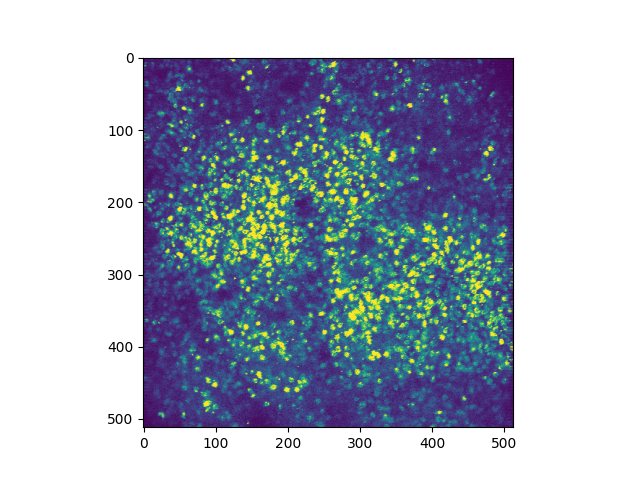

In [5]:
avg_image = imaging.get_average_image()
plt.figure()
plt.imshow(avg_image, vmax=20)

In [6]:
w = pmw.plot_imaging_series(imaging, backend="ipywidgets")

In [7]:
image_cache = imaging.save(folder_path="tests", overwrite=True, n_jobs=1)

Use cache_folder=C:\Users\ariellel\AppData\Local\Temp\spikeinterface_cache\tmpepz7_dz8\D878DGHK
write_binary_imaging 
engine=process - n_jobs=1 - samples_per_chunk=30 - chunk_memory=15.00 MiB - total_memory=15.00 MiB - chunk_duration=1.00s (999.52 ms)


write_binary_imaging (no parallelization):   0%|          | 0/67 [00:00<?, ?it/s]

In [8]:
import glob
binary_file = glob.glob(image_cache.to_dict()["kwargs"]["folder_path"] + "/*.raw")[0]

In [10]:
Lx, Ly = imaging.image_shape[0], imaging.image_shape[1]
frames=imaging.get_num_frames()
suite2p_extraction(Lx=Lx, Ly=Ly, n_frames=frames,filename=binary_file)

NOTE: Applying builtin classifier at C:\Users\ariellel\repos\photon-mosaic-demo\venv\Lib\site-packages\suite2p\classifiers\classifier.npy


----------- ROI DETECTION
Binning movie in chunks of length 10
Binned movie of size [200,512,512] created in 1.60 sec.
NOTE: estimated spatial scale ~6 pixels, time epochs 1.00, threshold 5.00 
0 ROIs, score=71.57
1000 ROIs, score=5.16
Detected 1192 ROIs, 5.62 sec
After removing overlaps, 1092 ROIs remain
----------- Total 8.57 sec.
----------- EXTRACTION
Masks created, 0.81 sec.
Extracted fluorescence from 1092 ROIs in 2000 frames, 1.94 sec.
----------- Total 2.85 sec.
----------- CLASSIFICATION
['skew', 'compact', 'npix_norm']
----------- SPIKE DECONVOLUTION
----------- Total 0.10 sec.
